## Matplotlib

In [ ]:
데이터 시각화 도구

In [ ]:
Figure (피규어)

그래프가 그려지는 전체 캔버스 또는 종이를 의미합니다. 하나의 Figure 안에는 여러 개의 그래프(Axes)가 포함될 수 있습니다. 크기나 해상도 등 전체적인 그림의 속성을 제어

Axes (액시즈)

Figure 위에 그려지는 개별 그래프 하나하나를 의미. 우리가 흔히 생각하는 플롯(plot)이 바로 이 Axes입니다. x축, y축, 제목, 범례 등 그래프의 모든 구성 요소 포함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 운영체제에 맞는 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: # Linux
    plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

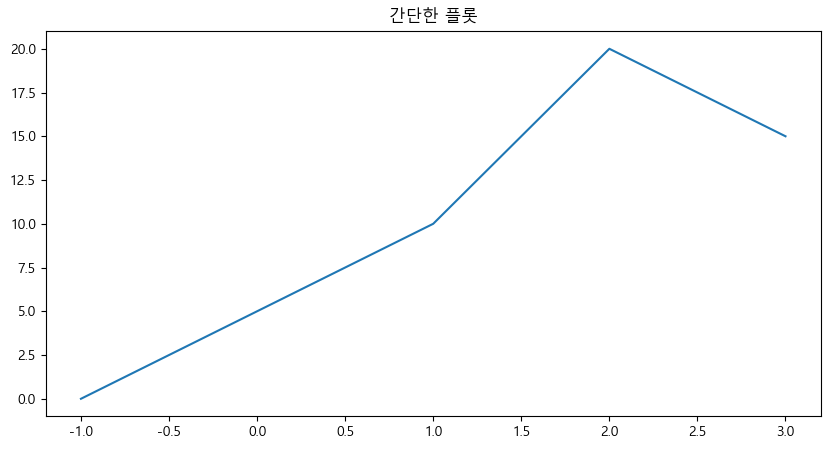

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot([-1, 1, 2, 3], [0, 10, 20, 15])
plt.title('간단한 플롯')
plt.show()

In [ ]:
2. 라인 플롯 (Line Plot)

시간의 흐름에 따른 데이터의 변화(추세)를 보여줄 때 가장 효과적. (예: 주가 변동, 월별 판매량, 기온 변화 등)

In [ ]:
ax.plot(x_data, y_data)

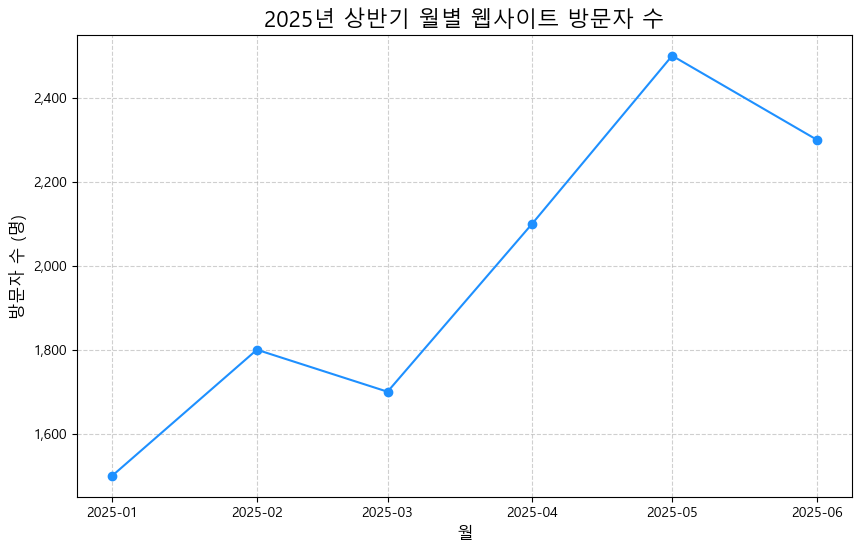

In [4]:
# --- 데이터 생성 ---
# 2023년 월별 웹사이트 방문자 수 데이터
data = {
    '월': pd.to_datetime(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01']),
    '방문자수': [1500, 1800, 1700, 2100, 2500, 2300]
}
df_line = pd.DataFrame(data)

# --- 시각화 코드 ---
# 1. Figure와 Axes 객체 생성 (도화지와 플롯 준비)
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 플롯 그리기
ax.plot(
    df_line['월'],          # x축 데이터
    df_line['방문자수'],    # y축 데이터
    marker='o',             # 데이터 지점에 동그란 마커 표시
    linestyle='-',          # 실선으로 연결
    color='dodgerblue'      # 선 색상 지정
)

# 3. 그래프 꾸미기
ax.set_title('2025년 상반기 월별 웹사이트 방문자 수', fontsize=16)
ax.set_xlabel('월', fontsize=12)
ax.set_ylabel('방문자 수 (명)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6) # 그리드 추가

# y축 단위를 더 보기 좋게 포맷팅
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
3. 바 차트 (Bar Chart)
여러 카테고리 간의 값을 비교할 때. (예: 팀별 실적 비교, 제품별 판매량, 투표 결과 등)

In [ ]:
ax.bar(categories, values)

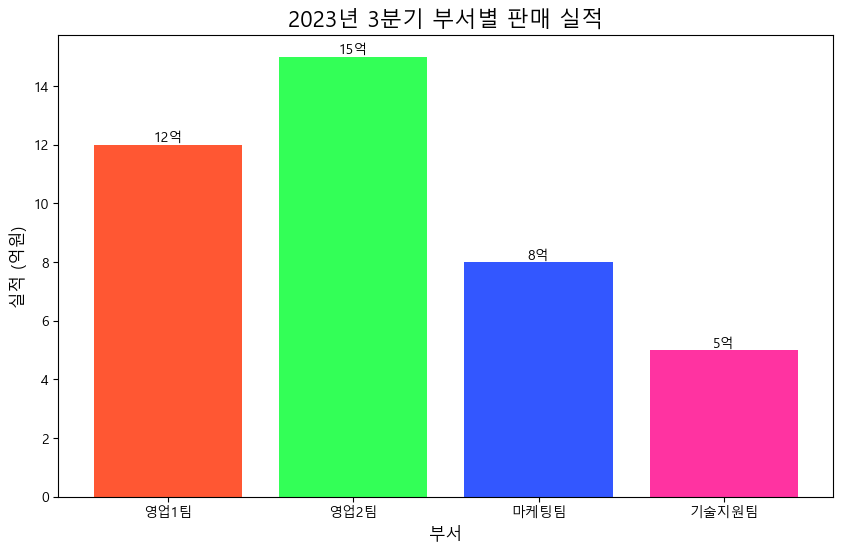

In [5]:
# --- 데이터 생성 ---
# 부서별 3분기 판매 실적
data = {
    '부서': ['영업1팀', '영업2팀', '마케팅팀', '기술지원팀'],
    '실적(억원)': [12, 15, 8, 5]
}
df_bar = pd.DataFrame(data)

# --- 시각화 코드 ---
# 1. Figure와 Axes 객체 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 플롯 그리기
bars = ax.bar(
    df_bar['부서'],        # x축 데이터
    df_bar['실적(억원)'],  # y축 데이터
    color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1'] # 각 바에 다른 색상 적용
)

# 3. 그래프 꾸미기
ax.set_title('2023년 3분기 부서별 판매 실적', fontsize=16)
ax.set_xlabel('부서', fontsize=12)
ax.set_ylabel('실적 (억원)', fontsize=12)

# 각 바 위에 실제 값 표시
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}억', va='bottom', ha='center') # va: vertical alignment

plt.show()

In [ ]:
4. 산점도 (Scatter Plot) Scatter
두 개의 숫자 변수 사이의 관계(상관관계)를 파악할 때. (예: 광고비와 매출의 관계, 공부 시간과 시험 성적의 관계 등)

In [ ]:
ax.scatter(x_variable, y_variable)

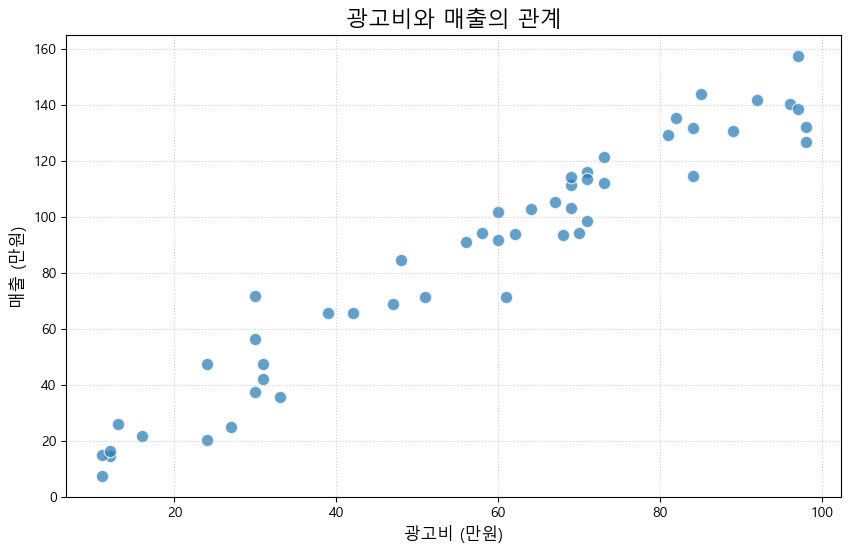

In [15]:
# --- 데이터 생성 ---
# 50개 매장의 광고비와 매출 데이터 (랜덤 생성)
np.random.seed(42) # 재현 가능성을 위해 시드 고정
advertising_cost = np.random.randint(10, 100, 50) # 10~99 사이 정수 50개
sales = advertising_cost * 1.5 + np.random.normal(0, 10, 50) # 광고비와 양의 상관관계를 갖도록 설정

# --- 시각화 코드 ---
# 1. Figure와 Axes 객체 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 플롯 그리기
ax.scatter(
    advertising_cost,  # x축 데이터
    sales,             # y축 데이터
    alpha=0.7,         # 점의 투명도
    edgecolors='w',    # 점의 테두리 색상
    s=80               # 점의 크기
)

# 3. 그래프 꾸미기
ax.set_title('광고비와 매출의 관계', fontsize=16)
ax.set_xlabel('광고비 (만원)', fontsize=12)
ax.set_ylabel('매출 (만원)', fontsize=12)
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

In [ ]:
5. 히스토그램 (Histogram)
하나의 숫자 데이터가 어떤 분포를 가지고 있는지(어떤 값 구간에 데이터가 많이 몰려 있는지) 확인할 때. (예: 고객 나이 분포, 시험 성적 분포 등)

In [ ]:
ax.hist(data, bins=20) # bins는 구간의 개수

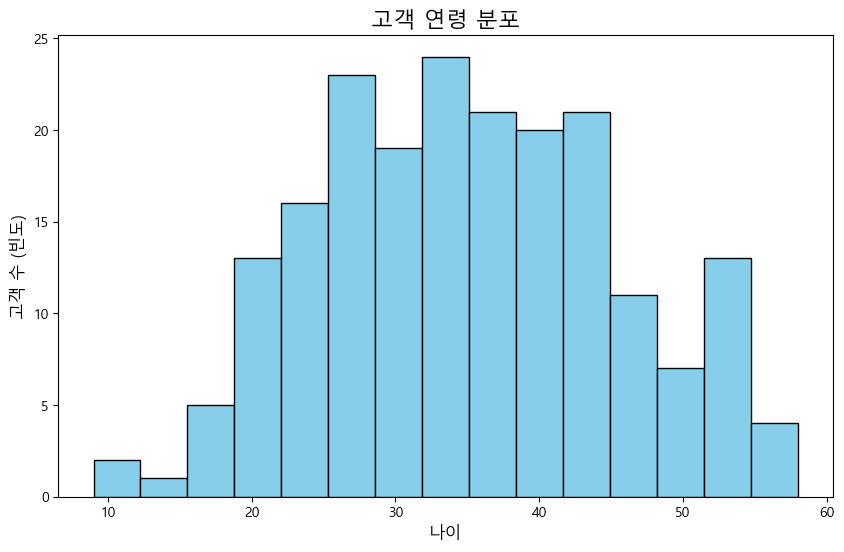

In [16]:
# --- 데이터 생성 ---
# 200명 고객의 나이 데이터 (평균 35세, 표준편차 10의 정규분포를 따름)
np.random.seed(0)
customer_ages = np.random.normal(loc=35, scale=10, size=200).astype(int)

# --- 시각화 코드 ---
# 1. Figure와 Axes 객체 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 플롯 그리기
ax.hist(
    customer_ages,     # 데이터
    bins=15,           # 막대의 개수(계급의 개수)
    color='skyblue',
    edgecolor='black'
)

# 3. 그래프 꾸미기
ax.set_title('고객 연령 분포', fontsize=16)
ax.set_xlabel('나이', fontsize=12)
ax.set_ylabel('고객 수 (빈도)', fontsize=12)

plt.show()

In [ ]:
# 여러 플롯 그리기

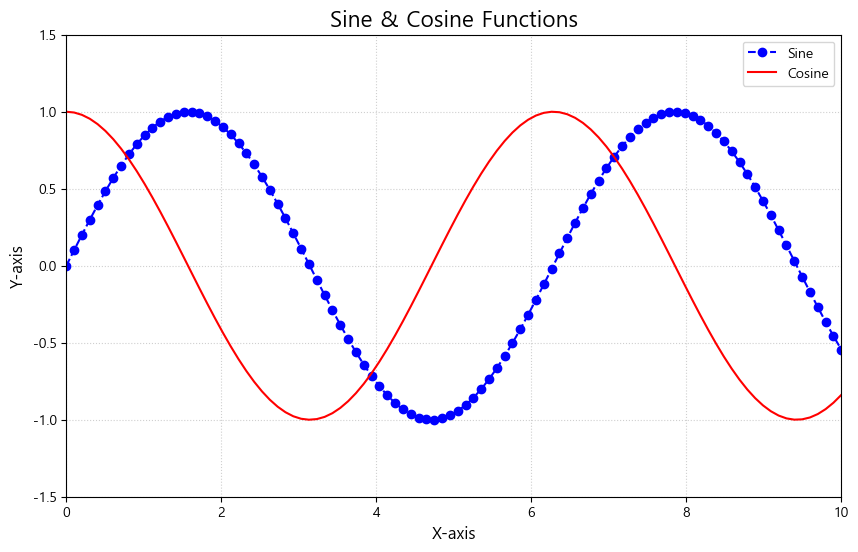

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 1. Figure 및 Axes 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 2. 플롯 그리기 (색상, 선 스타일, 마커, 라벨 지정)
ax.plot(x, y1, color='blue', linestyle='--', marker='o', label='Sine')
ax.plot(x, y2, color='red', linestyle='-', label='Cosine')

# 3. 제목 및 축 라벨 설정
ax.set_title('Sine & Cosine Functions', fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)

# 4. 범례(Legend) 표시
ax.legend(loc='upper right')

# 5. 그리드(Grid) 추가
ax.grid(True, linestyle=':', alpha=0.6)

# 6. 축 범위 지정
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

plt.show()

In [ ]:
# 여러 개의 플롯 그리기 (Subplots)

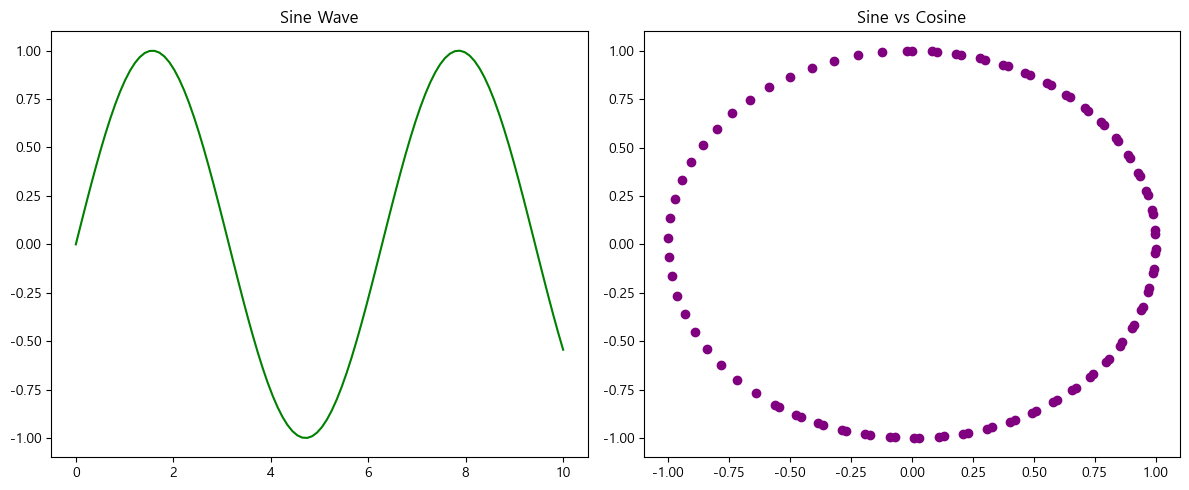

In [12]:
# 1행 2열의 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 첫 번째 플롯 (axes[0])
axes[0].plot(x, y1, color='green')
axes[0].set_title('Sine Wave')

# 두 번째 플롯 (axes[1])
axes[1].scatter(y1, y2, color='purple')
axes[1].set_title('Sine vs Cosine')

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

## seaborn

In [7]:
# 1. Matplotlib을 기반으로 만들어진 파이썬 데이터 시각화 라이브러리
# 더 아름다운 기본 스타일과 복잡한 통계 시각화를 위한 고수준의 기능을 제공
# Seaborn은 Matplotlib 위에서 동작

SyntaxError: invalid syntax (4081469003.py, line 1)

In [8]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 640.0 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


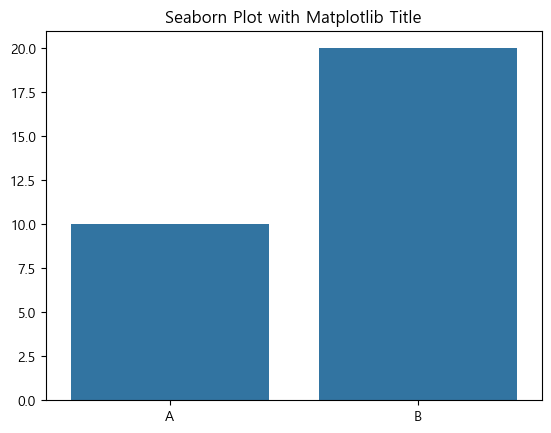

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn으로 기본 플롯 생성
ax = sns.barplot(x=['A', 'B'], y=[10, 20])

# Matplotlib으로 제목 추가
ax.set_title("Seaborn Plot with Matplotlib Title")
plt.show() ### >> mat 위에서 동작하기 때문에 seaborn으로 어떤 그래프를 그리겠다고 기본을 정하고 > mat 립으로 제목이랑 세부설정을 정해서 완성

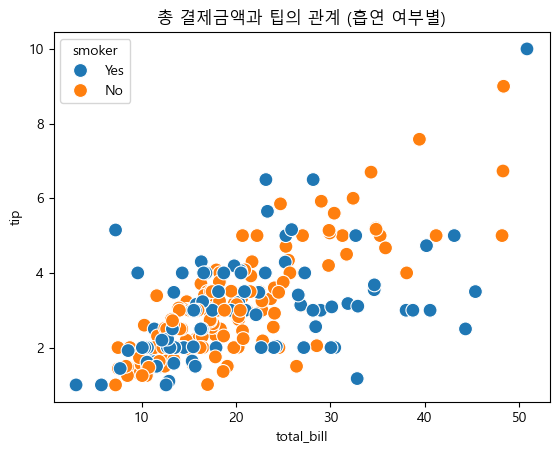

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn에 내장된 'tips' 데이터셋 로드
tips = sns.load_dataset("tips")  ##> 시본이 가지고 있는 데이터 셋이고 이걸 불러와야 쓸 수 있음

# 팁(tip)과 총 결제금액(total_bill)의 관계를 흡연여부(smoker)에 따라 색상으로 구분
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", s=100)  #> hue = 원형 정보를 내가 보고 싶은 데이터 자료로 바꿔도 됨.
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

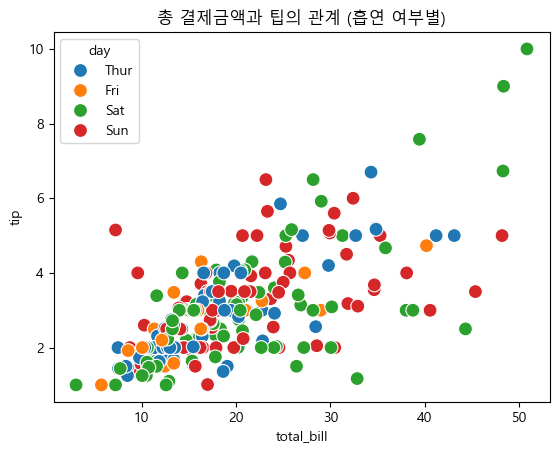

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn에 내장된 'tips' 데이터셋 로드
tips = sns.load_dataset("tips")  ##> 시본이 가지고 있는 데이터 셋이고 이걸 불러와야 쓸 수 있음

# 팁(tip)과 총 결제금액(total_bill)의 관계를 흡연여부(smoker)에 따라 색상으로 구분
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", s=100)  #> hue = 원형 정보를 내가 보고 싶은 데이터 자료로 바꿔도 됨.
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

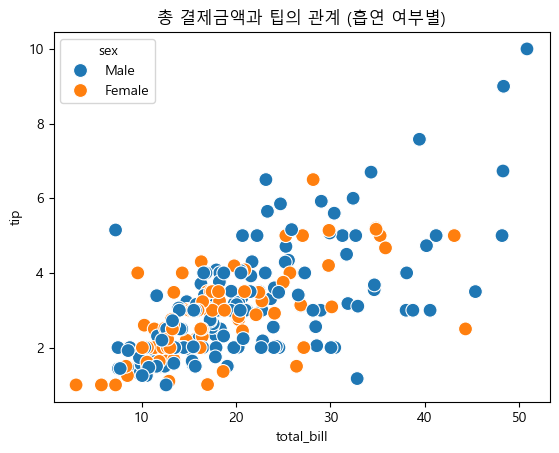

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn에 내장된 'tips' 데이터셋 로드
tips = sns.load_dataset("tips")  ##> 시본이 가지고 있는 데이터 셋이고 이걸 불러와야 쓸 수 있음

# 팁(tip)과 총 결제금액(total_bill)의 관계를 흡연여부(smoker)에 따라 색상으로 구분
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", s=100)  #> hue = 원형 정보를 내가 보고 싶은 데이터 자료로 바꿔도 됨.
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

In [15]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
2. 분포 시각화 (histplot, kdeplot, jointplot)

sns.histplot(data=df, x='col'): 히스토그램.
sns.kdeplot(data=df, x='col'): 부드러운 곡선으로 분포를 보여주는 커널 밀도 추정 플롯.
sns.jointplot(data=df, x='x_col', y='y_col'): 두 변수의 관계(산점도)와 각 변수의 분포(히스토그램)를 한 번에 보여줌

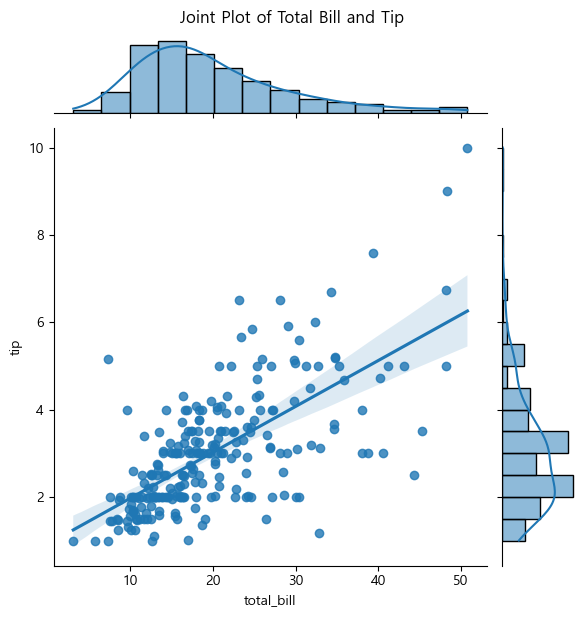

In [19]:
# 총 결제금액과 팁의 관계 및 각각의 분포를 한눈에 보기
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg") # kind="reg"는 회귀선을 추가
plt.suptitle("Joint Plot of Total Bill and Tip", y=1.02)
plt.show()

In [ ]:
3. 범주형 데이터 시각화 (boxplot, barplot, violinplot, countplot)

sns.boxplot(data=df, x='category_col', y='value_col'): 카테고리별 수치 데이터의 분포(중앙값, 사분위수, 이상치)를 상자 그림.
sns.barplot(data=df, x='category_col', y='value_col'): 카테고리별 수치 데이터의 평균과 신뢰구간을 막대로.
sns.violinplot(data=df, x='category_col', y='value_col'): Box Plot과 KDE Plot을 합친 형태로, 분포의 모양까지.
sns.countplot(data=df, x='category_col'): 카테고리별 데이터의 개수(count)를 막대로.

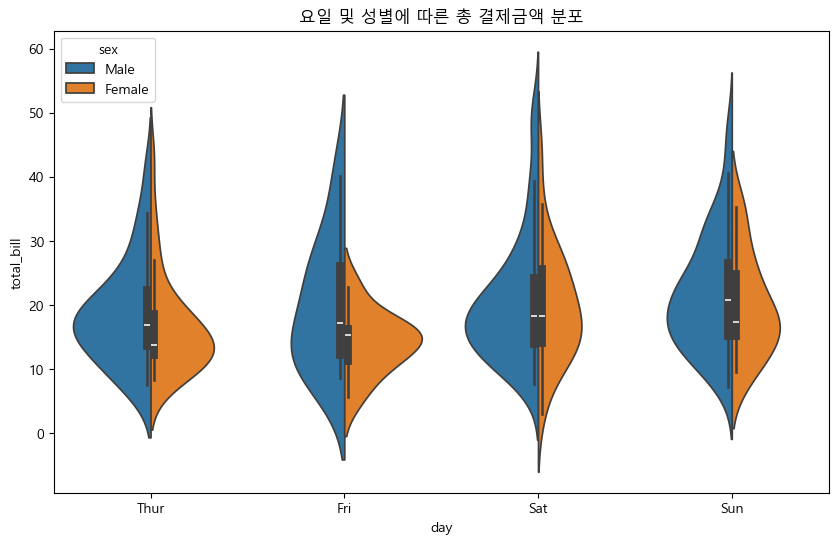

In [20]:
# 요일(day)별 총 결제금액(total_bill)의 분포를 바이올린 플롯으로 확인
# 성별(sex)에 따라 색상을 구분 (hue)
plt.figure(figsize=(10, 6))
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True)
plt.title("요일 및 성별에 따른 총 결제금액 분포")
plt.show()

In [ ]:
4. 매트릭스 및 회귀 시각화 (heatmap, pairplot, lmplot)

sns.heatmap(df.corr(numeric_only=True), annot=True): 상관계수 행렬 등 숫자 매트릭스를 색상으로 시각화. annot=True는 각 셀에 숫자 표시 옵션.
sns.pairplot(df): 데이터프레임에 있는 모든 숫자형 변수들 간의 관계를 한 번에 보여줌

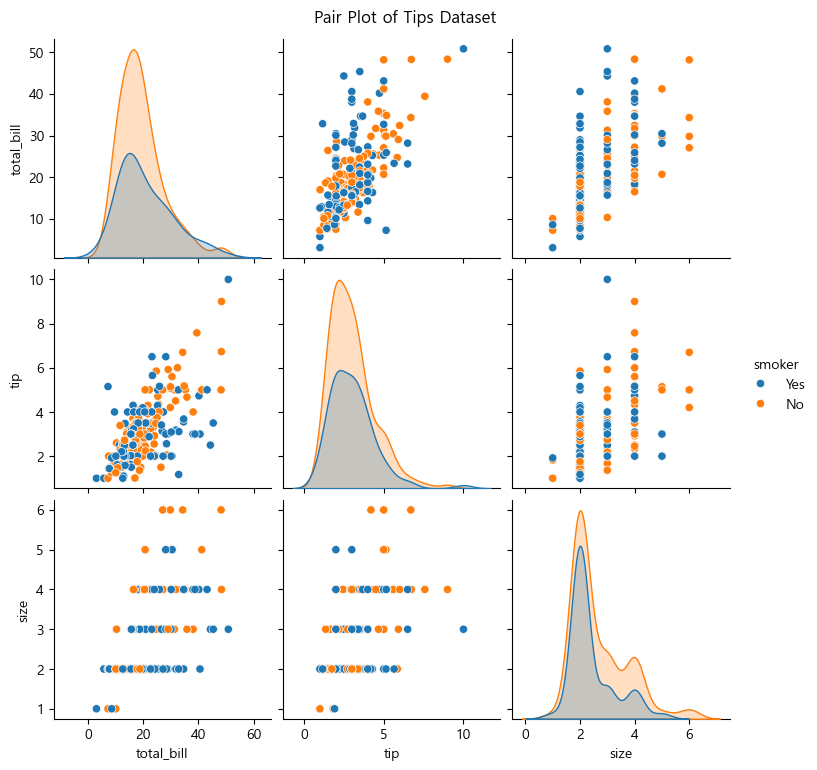

In [22]:
# tips 데이터셋의 숫자형 변수들 간 모든 관계를 한눈에 보기
sns.pairplot(data=tips, hue="smoker")
plt.suptitle("Pair Plot of Tips Dataset", y=1.02)
plt.show()

NameError: name 'flights' is not defined

In [ ]:
annot=True: 각 셀에 숫자 값을 표시
fmt='.2f': 숫자의 형식을 지정(소수점 둘째 자리까지).
cmap='viridis': 히트맵의 색상 맵(colormap)을 지정.
linewidths=.5: 각 셀을 구분하는 선의 두께 지정.

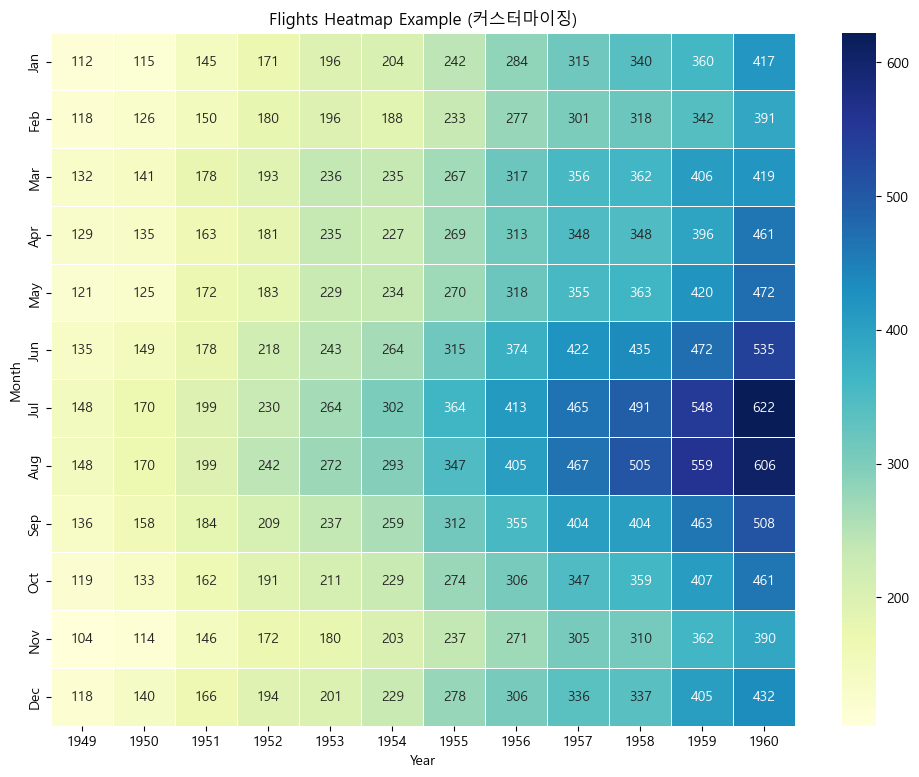

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 준비
data = np.random.rand(10, 12)
flights = sns.load_dataset("flights").pivot(index="month", columns="year", values="passengers") # seaborn 예제 데이터 사용

# 2. 꾸민 히트맵 생성
plt.figure(figsize=(12, 9))
sns.heatmap(flights, annot=True, fmt="d", cmap='YlGnBu', linewidths=.5)

# 3. 그래프 제목 및 축 라벨 설정 후 출력
plt.title('Flights Heatmap Example (커스터마이징)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [26]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508
